# Solve Max-Flow Problem

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os

Mounted at /content/drive/


In [2]:
!pip install ortools

     |████████████████████████████████| 15.5 MB 5.2 MB/s 
     |████████████████████████████████| 1.0 MB 57.9 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [3]:
# Now in order to find the max-flow paths, I decide to use pachanges ortools. But I successfully find the max-flow value
from ortools.graph import pywrapgraph

max_flow = pywrapgraph.SimpleMaxFlow()

In [ ]:
# eaxmple 1
data = [[1,0,200],
        [2,0,150],
        [3,0,500],
        [4,0,150],
        [5,0,100],
        [6,1,100],
        [6,3,250],
        [7,2,50],
        [7,3,100],
        [7,4,50],
        [8,4,300],
        [8,5,150],
        [1,2,150],
        [5,4,150],
        [6,7,200],
        [8,7,200],
        [9,6,400],
        [9,7,200],
        [9,8,400],
        [2,4,100],
        [2,5,100],
        [8,2,100],
        [7,5,50],
        [3,5,150],
        [3,1,50],
        [3,8,200]]


In [4]:
# example 2
data = [[1,0,300],
        [2,0,300],
        [3,0,100],
        [4,0,100],
        [2,1,50],
        [3,2,100],
        [3,4,100],
        [4,1,100],
        [5,1,200],
        [5,3,300],
        [2,5,100],
        [6,2,150],
        [6,3,100],
        [6,4,50],
        [5,6,300],
        [7,5,800],
        [7,6,500]] 




In [5]:
len(data)

17

In [6]:
# define the data
start_nodes=[]
end_nodes=[]
capacities=[]
for element in data:
  end_nodes.append(element[1])
  start_nodes.append(element[0])
  capacities.append(element[2])
print(start_nodes,end_nodes,capacities)
for arc in zip(start_nodes, end_nodes, capacities):
    max_flow.AddArcWithCapacity(arc[0], arc[1], arc[2])

[1, 2, 3, 4, 2, 3, 3, 4, 5, 5, 2, 6, 6, 6, 5, 7, 7] [0, 0, 0, 0, 1, 2, 4, 1, 1, 3, 5, 2, 3, 4, 6, 5, 6] [300, 300, 100, 100, 50, 100, 100, 100, 200, 300, 100, 150, 100, 50, 300, 800, 500]


In [8]:
status = max_flow.Solve(7, 0)

In [9]:
flow_path = []
# Print the text result
if status != max_flow.OPTIMAL:
    print('There was an issue with the max flow input.')
    print(f'Status: {status}')
    exit(1)

print('Max flow:', max_flow.OptimalFlow())
print('')
print('  Arc    Flow / Capacity')
for i in range(max_flow.NumArcs()):
    print('%1s -> %1s   %3s  / %3s' %
          (max_flow.Tail(i), max_flow.Head(i), max_flow.Flow(i),max_flow.Capacity(i)))
    flow_path.append([max_flow.Tail(i), max_flow.Head(i), max_flow.Flow(i),max_flow.Capacity(i)])
print('Source side min-cut:', max_flow.GetSourceSideMinCut())
print('Sink side min-cut:', max_flow.GetSinkSideMinCut())

Max flow: 700

  Arc    Flow / Capacity
1 -> 0   250  / 300
2 -> 0   250  / 300
3 -> 0   100  / 100
4 -> 0   100  / 100
2 -> 1     0  /  50
3 -> 2   100  / 100
3 -> 4   100  / 100
4 -> 1    50  / 100
5 -> 1   200  / 200
5 -> 3   200  / 300
2 -> 5     0  / 100
6 -> 2   150  / 150
6 -> 3   100  / 100
6 -> 4    50  /  50
5 -> 6     0  / 300
7 -> 5   400  / 800
7 -> 6   300  / 500
Source side min-cut: [7, 5, 6, 3]
Sink side min-cut: [0, 1, 2, 4]


In [10]:
flow_path

[[1, 0, 250, 300],
 [2, 0, 250, 300],
 [3, 0, 100, 100],
 [4, 0, 100, 100],
 [2, 1, 0, 50],
 [3, 2, 100, 100],
 [3, 4, 100, 100],
 [4, 1, 50, 100],
 [5, 1, 200, 200],
 [5, 3, 200, 300],
 [2, 5, 0, 100],
 [6, 2, 150, 150],
 [6, 3, 100, 100],
 [6, 4, 50, 50],
 [5, 6, 0, 300],
 [7, 5, 400, 800],
 [7, 6, 300, 500]]

# Plot Graph

In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle

In [12]:
# Get All edges
edges = []
edge_maxflow_use = []
edge_maxflow_not = []
edge_capacities = {}
label_maxflow_use = {}
label_maxflow_not={}


for path in flow_path:
  link_twonodes = tuple(path[0:2])
  edges.append(tuple(link_twonodes))
  edge_capacities[link_twonodes]= str(path[3])+" → →"
  if path[2] == 0:
    edge_maxflow_not.append(tuple(path[0:2]))
    label_maxflow_not[link_twonodes] = str(path[2])+" ("+str(path[3])+")" + " → →"
  if path[2] > 0:
    edge_maxflow_use.append(tuple(path[0:2]))
    label_maxflow_use[link_twonodes] = str(path[2])+" ("+str(path[3])+")"+" → →"

for path in edges:
  print(path)
  print(edge_capacities[path])
  print()

(1, 0)
300 → →

(2, 0)
300 → →

(3, 0)
100 → →

(4, 0)
100 → →

(2, 1)
50 → →

(3, 2)
100 → →

(3, 4)
100 → →

(4, 1)
100 → →

(5, 1)
200 → →

(5, 3)
300 → →

(2, 5)
100 → →

(6, 2)
150 → →

(6, 3)
100 → →

(6, 4)
50 → →

(5, 6)
300 → →

(7, 5)
800 → →

(7, 6)
500 → →



In [ ]:
edge_maxflow_use

[(1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 1),
 (6, 3),
 (7, 2),
 (7, 3),
 (8, 4),
 (8, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (8, 2),
 (7, 5)]

In [ ]:
edge_maxflow_not

[(7, 4),
 (1, 2),
 (5, 4),
 (6, 7),
 (8, 7),
 (2, 4),
 (2, 5),
 (3, 5),
 (3, 1),
 (3, 8)]

In [13]:
# Build Graph
DG = nx.DiGraph()
DG.add_nodes_from([0,1,2,3,4,5,6,7])
DG.add_edges_from(edges)


In [ ]:
# Plot a Circle Graph
fig = plt.figure(figsize=(15,15))
plt.axis('off')
#pos=nx.spectral_layout(DG)
pos = nx.circular_layout(DG)
node_color=["#fac205",
            '#d8dcd6','#d8dcd6','#d8dcd6','#d8dcd6',
            '#d8dcd6','#d8dcd6',"#bf77f6"]

nx.draw_networkx_nodes(DG,pos, node_size=800, 
                       node_color=node_color)

nx.draw_networkx_labels(DG,pos,font_size=15)

nx.draw_networkx_edges(DG,pos,width=3,
                       edge_color='skyblue',alpha=0.3,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')

nx.draw_networkx_edge_labels(DG,pos,edge_labels=edge_capacities,
                             alpha=0.75,font_size=10,
                             verticalalignment='center')

#plt.savefig("/content/drive/My Drive/Student/Origin_Graph.png")

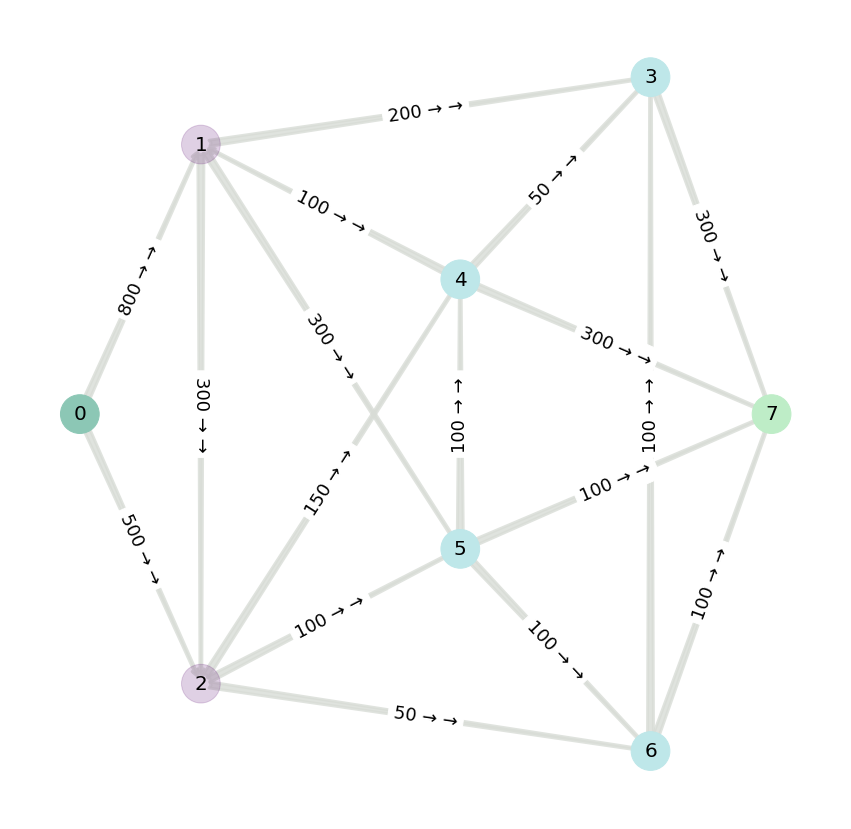

In [16]:
# Rewrite the Graph
fig = plt.figure(figsize=(15,15))
plt.axis('off')

pos = {0:[1,0],1:[0.65,0.75],2:[0.1,0.3],3:[0.1,-0.3],
       4:[0.65,-0.75],5:[-0.65,0.6],6:[-0.65,-0.6],7:[-1,0]}

node_label= {7:0,5:1,6:2,1:3,2:4,3:5,4:6,0:7}

node_color=["#BEEDC7",
            '#BEE7E9','#BEE7E9','#BEE7E9','#BEE7E9',                                               #75bbfd #蓝色
            '#63187933','#63187933',
            "#8CC7B5"]


nx.draw_networkx_nodes(DG,pos, node_size=1500, node_color=node_color)

nx.draw_networkx_labels(DG,pos,labels=node_label,font_size=20)

nx.draw_networkx_edges(DG,pos,width=3,
                       edge_color='#d8dcd6',alpha=0.8,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')

nx.draw_networkx_edge_labels(DG,pos,edge_labels=edge_capacities,
                             alpha=1,font_size=18,
                             verticalalignment='center')


plt.savefig("/content/drive/My Drive/Student/Rewrite_Graph_0_7.png")

NetworkXError: ignored

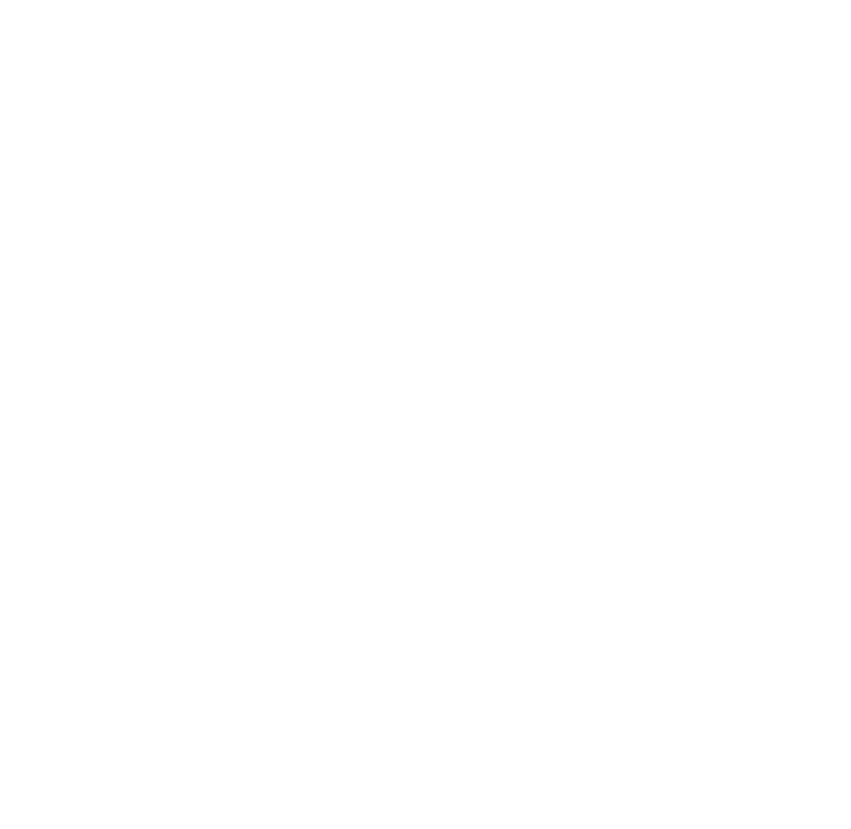

In [ ]:
# Show the result of Max Flow for (7,0)
fig = plt.figure(figsize=(15,15))
plt.axis('off')

pos = {0:[1,0],1:[0.65,0.75],2:[0.1,0.3],3:[0.1,-0.3],
       4:[0.65,-0.75],5:[-0.65,0.6],6:[-0.65,-0.6],7:[-1,0]}

node_color=["#BEEDC7",
            '#BEE7E9','#BEE7E9','#BEE7E9','#BEE7E9',                                               
            '#63187933','#63187933',
            "#8CC7B5"]

node_label= {7:0,5:1,6:2,1:3,2:4,3:5,4:6,0:7}

nx.draw_networkx_nodes(DG,pos, node_size=1500, node_color=node_color)

nx.draw_networkx_labels(DG,pos,labels=node_label,font_size=20)

nx.draw_networkx_edges(DG,pos,edgelist=edge_maxflow_not,
                       width=3,
                       edge_color='skyblue',alpha=0.05,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')

nx.draw_networkx_edges(DG,pos,edgelist=edge_maxflow_use,
                       width=3,
                       edge_color='#929591',alpha=0.7,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')


nx.draw_networkx_edge_labels(DG,pos,edge_labels=label_maxflow_not,
                             alpha=0.1,font_size=15,
                             verticalalignment='center')

nx.draw_networkx_edge_labels(DG,pos,edge_labels=label_maxflow_use,
                             alpha=1,font_size=18,
                             verticalalignment='center')

#plt.savefig("/content/drive/My Drive/Student/Result_Graph_0_7.png")

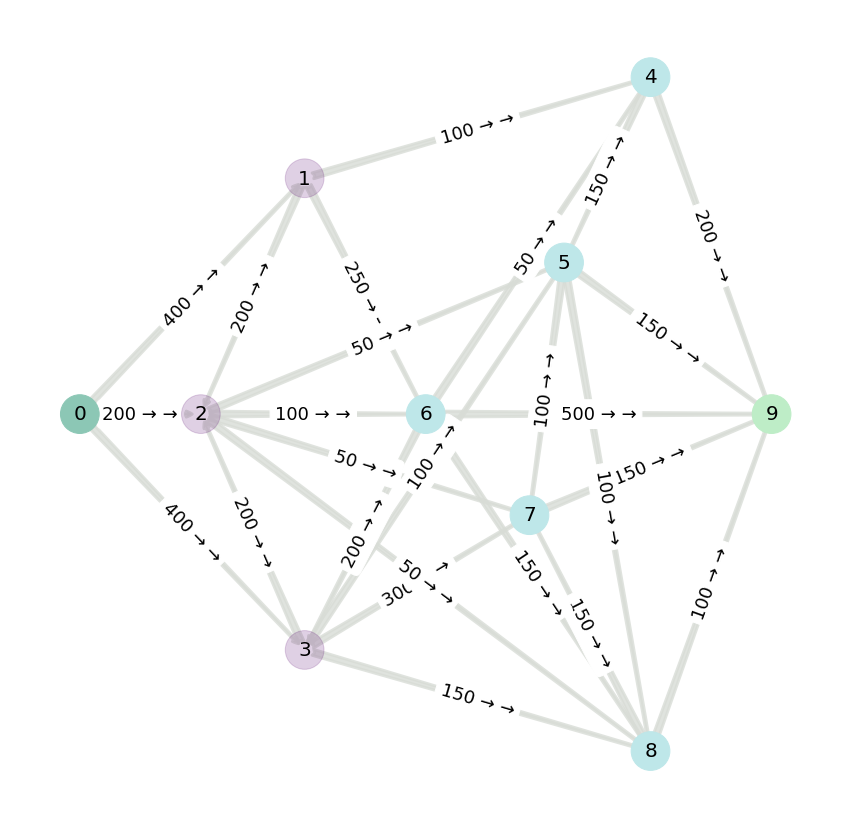

In [ ]:
# Build a 9 points graph
# Rewrite the Graph
fig = plt.figure(figsize=(15,15))
plt.axis('off')

pos = {0:[1,0],
       1:[0.65,1],2:[0.4,0.45],3:[0,0],4:[0.3,-0.3],5:[0.65,-1],
       6:[-0.35,0.7],7:[-0.65,0],8:[-0.35,-0.7],
       9:[-1,0]}
node_color=["#BEEDC7",
            '#BEE7E9','#BEE7E9','#BEE7E9','#BEE7E9','#BEE7E9',                                              #75bbfd #蓝色
            '#63187933','#63187933','#63187933',
            "#8CC7B5"]
node_label= {9:0,6:1,7:2,8:3,1:4,2:5,3:6,4:7,5:8,0:9}

nx.draw_networkx_nodes(DG,pos, node_size=1500, node_color=node_color)

nx.draw_networkx_labels(DG,pos,font_size=20,labels=node_label)

nx.draw_networkx_edges(DG,pos,width=3,
                       edge_color='#d8dcd6',alpha=0.8,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')

nx.draw_networkx_edge_labels(DG,pos,edge_labels=edge_capacities,
                             alpha=1,font_size=18,
                             verticalalignment='center')

plt.savefig("/content/drive/My Drive/Student/Origin_Graph_0_9.png")


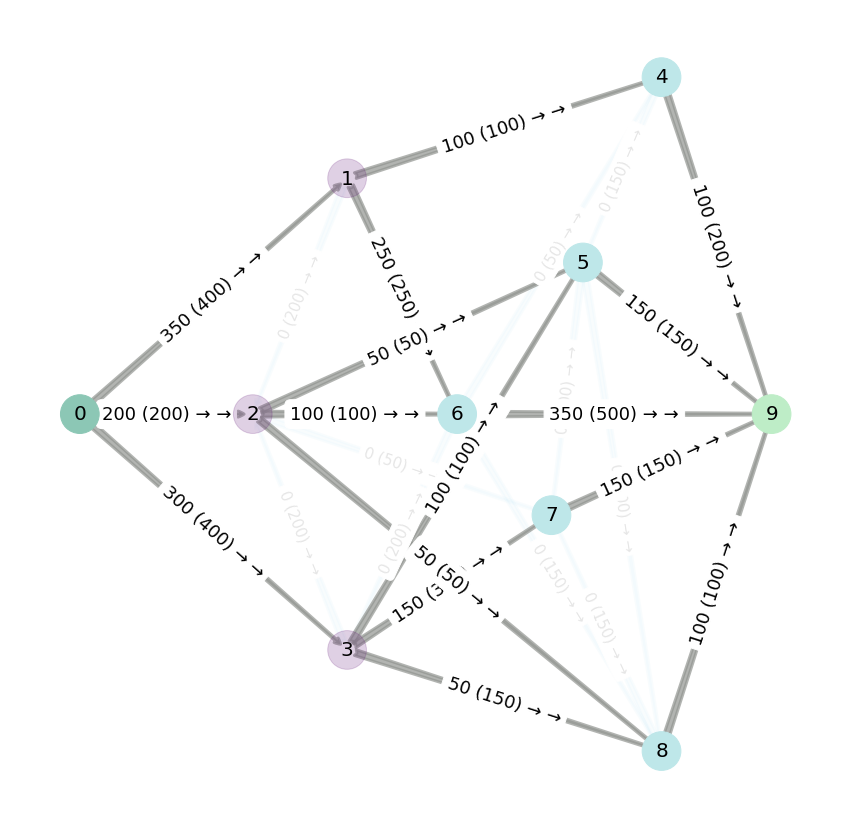

In [ ]:
# Show the result of Max Flow for (7,0)
fig = plt.figure(figsize=(15,15))
plt.axis('off')

pos = {0:[1,0],
       1:[0.65,1],2:[0.4,0.45],3:[0,0],4:[0.3,-0.3],5:[0.65,-1],
       6:[-0.35,0.7],7:[-0.65,0],8:[-0.35,-0.7],
       9:[-1.2,0]}

node_color=["#BEEDC7",
            '#BEE7E9','#BEE7E9','#BEE7E9','#BEE7E9','#BEE7E9',                                              #75bbfd #蓝色
            '#63187933','#63187933','#63187933',
            "#8CC7B5"]

node_label= {9:0,6:1,7:2,8:3,1:4,2:5,3:6,4:7,5:8,0:9}

nx.draw_networkx_nodes(DG,pos, node_size=1500, node_color=node_color)

nx.draw_networkx_labels(DG,pos,labels=node_label,font_size=20)

nx.draw_networkx_edges(DG,pos,edgelist=edge_maxflow_not,
                       width=3,
                       edge_color='skyblue',alpha=0.05,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')

nx.draw_networkx_edges(DG,pos,edgelist=edge_maxflow_use,
                       width=3,
                       edge_color='#929591',alpha=0.7,                                         #edge_cmap=plt.cm.Blues,
                       arrowsize=15,arrowstyle='fancy')


nx.draw_networkx_edge_labels(DG,pos,edge_labels=label_maxflow_not,
                             alpha=0.1,font_size=15,
                             verticalalignment='center')

nx.draw_networkx_edge_labels(DG,pos,edge_labels=label_maxflow_use,
                             alpha=1,font_size=18,
                             verticalalignment='center')

plt.savefig("/content/drive/My Drive/Student/Result_Graph_0_9.png")

# Source

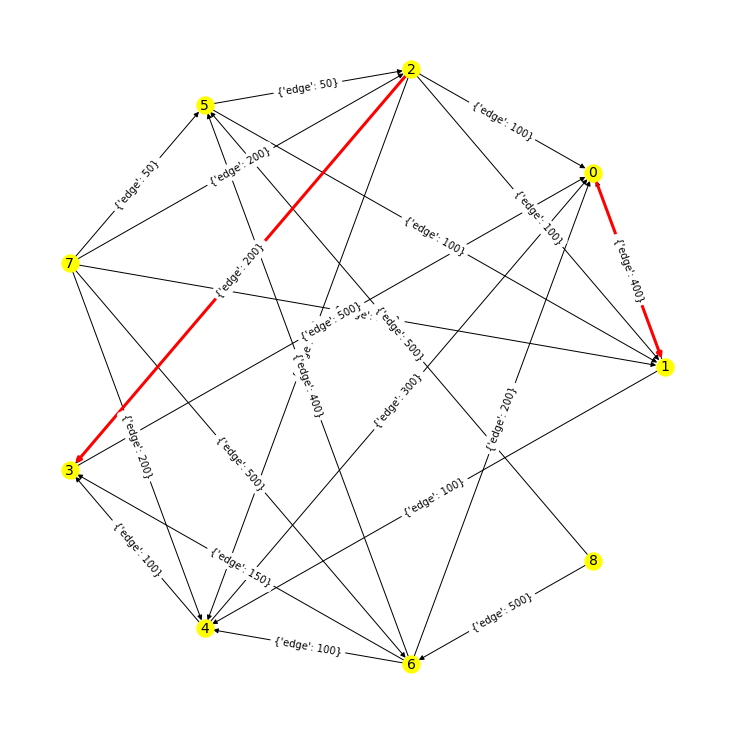

In [ ]:
# 用dataframe画图
kg_df = pd.DataFrame({'source':start_nodes,'target':end_nodes,'edge':capacities})

# create a KG
G = nx.from_pandas_edgelist(kg_df,'source','target',edge_attr=True,create_using=nx.MultiDiGraph)

# plot the network
plt.figure(figsize=(10,10))
#pos=nx.spring_layout(G)
pos = nx.circular_layout(G)
nx.draw(G,with_labels=True,node_color='yellow',pos=pos,font_size=14)

path = [(0,1),(2,3)]
nx.draw_networkx_edges(G,pos,edgelist=path,width=3,edge_color='r')  # 在图里标注边
nx.draw_networkx_edge_labels(G,pos)

plt.show()

In [ ]:
# 资料
'''
图的几种布局如下：
nx.spring_layout()
nx.circular_layout()
nx.spectral_layout()
nx.shell_layout()
'''


'\n图的几种布局如下：\nnx.spring_layout()\nnx.circular_layout()\nnx.spectral_layout()\nnx.shell_layout()\n'

{(1, 2): Text(-0.5, -0.323, '0.5'), (3, 1): Text(0.391, -0.2, '0.75')}

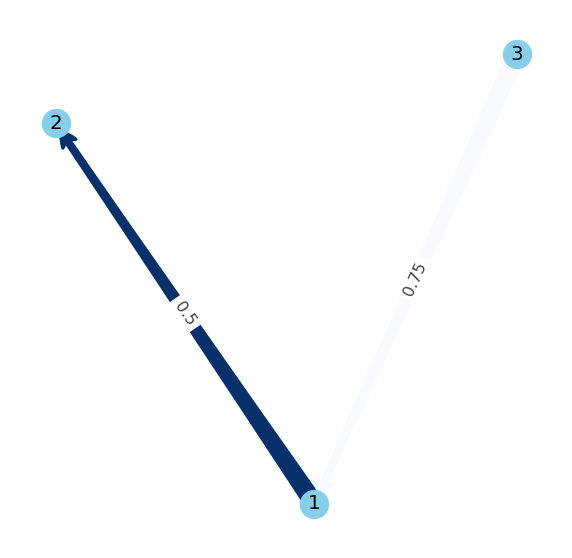

In [ ]:
#plt.figure(figsize=(10,10))
DG = nx.DiGraph()
DG.add_nodes_from([
                   (1,{'color':'red'}),
                   (2,{'color':'blue'}),
                   (3,{'color':'green'})
])
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
color_weight = [10,9]

fig = plt.figure(figsize=(10,10))
plt.axis('off')

#pos=nx.spectral_layout(DG)
pos = {1:[0,-1],2:[-1,0.354],3:[0.782,0.6]}
label={(1,2):0.5,(3,1):0.75}

nx.draw_networkx_nodes(DG,pos, node_size=800, node_color='skyblue')
nx.draw_networkx_labels(DG,pos,font_size=20)

nx.draw_networkx_edges(DG,pos,width=3,edge_color=color_weight,edge_cmap=plt.cm.Blues,arrows=True,arrowsize=40,arrowstyle='fancy')
nx.draw_networkx_edge_labels(DG,pos,edge_labels=label,alpha=0.75,font_size=16,verticalalignment='center')

#fig.set_facecolor("#00000F")


In [ ]:
a = [0]
a.append(1)
a

[0, 1]

In [ ]:
a[::-1]

[1, 0]